<a href="https://colab.research.google.com/github/antoniogss/GeoPandas/blob/main/map_co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import wb

!pip install geopandas mapclassify
import geopandas
import mapclassify
gc.output.clear()

#Google Drive connection

In [ ]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )
gc.output.clear()

In [ ]:
%cd ./gdrive/MyDrive/CTS/seminario_1/graficos/

#Indexes

In [ ]:
"""	
0 - CO2 emissions (kt)
1 - GDP per capita (current US$)
2 - Forest area (sq. km)
"""
index = ['EN.ATM.CO2E.KT', #0
         'NY.GDP.PCAP.CD', #1
         'AG.LND.FRST.K2'] #2

##CO2

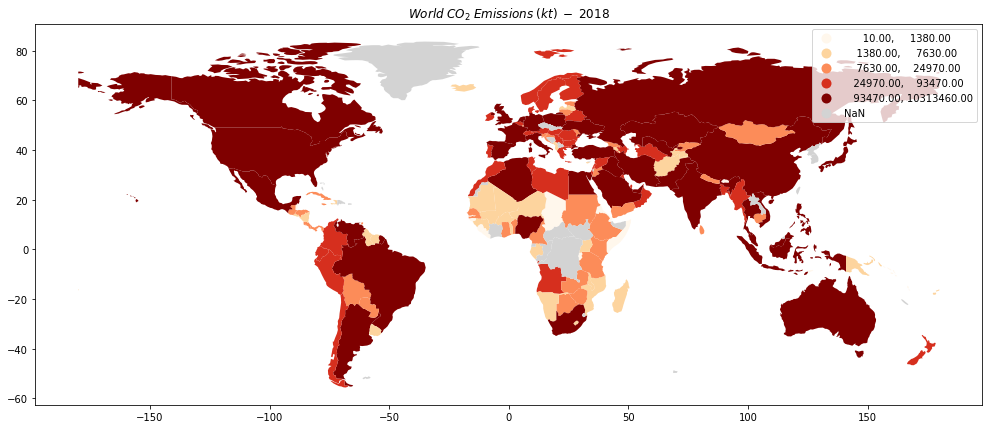

In [ ]:
data = wb.download(indicator=index[0],
                   country='all',
                   start=2018,
                   end=2018
                  )

data = data.reset_index(1)
data.columns = ['year','CO2']
data[['CO2']] = data[['CO2']].apply(pd.to_numeric)
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica'] #excluding Antarctica for visual purposes
map = map.set_index('name')
index_change = {
    'United States of America': 'United States',
    'Yemen': 'Yemen, Rep.',
    'Venezuela': 'Venezuela, RB',
    'Syria': 'Syrian Arab Republic',
    'Solomon Is.': 'Solomon Islands',
    'Russia': 'Russian Federation',
    'Iran': 'Iran, Islamic Rep.',
    'Gambia': 'Gambia, The',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Mauritania': 'Mauritius',
    'Egypt': 'Egypt, Arab Rep.'
}
map = map.rename(index=index_change)
map = map.join(data, how='outer')
map.plot('CO2',
          cmap='OrRd', 
          scheme='quantiles', 
          missing_kwds={"color": "lightgrey"}, 
          legend=True, 
          figsize=(18,7)
        )
plt.title("$World\;CO_{2}\;Emissions\;(kt)\;-\;2018$")
plt.savefig('map_co2.png', dpi = 200)
plt.show()

##GDP

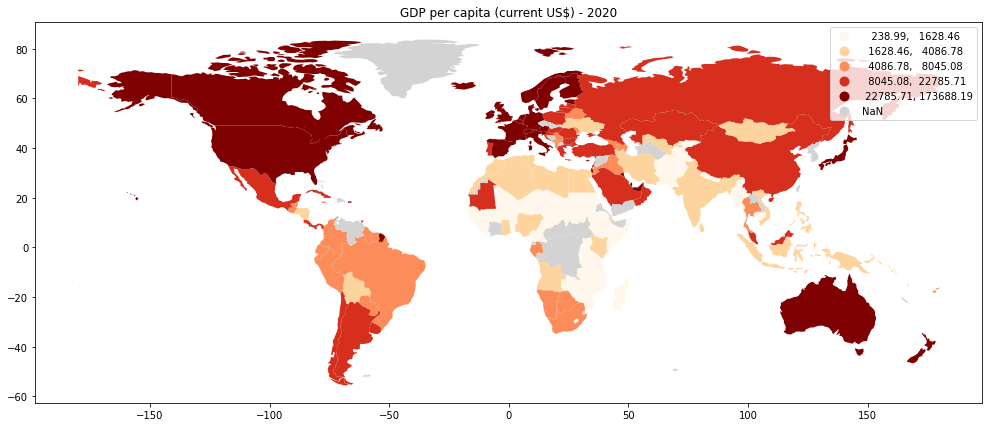

In [ ]:
data = wb.download(indicator=index[1],
                   country='all',
                   start=2020,
                   end=2020
                  )

data = data.reset_index(1)
data.columns = ['year','GDP per capita']
data[['GDP per capita']] = data[['GDP per capita']].apply(pd.to_numeric)
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica'] #excluding Antarctica for visual purposes
map = map.set_index('name')
index_change = {
    'United States of America': 'United States',
    'Yemen': 'Yemen, Rep.',
    'Venezuela': 'Venezuela, RB',
    'Syria': 'Syrian Arab Republic',
    'Solomon Is.': 'Solomon Islands',
    'Russia': 'Russian Federation',
    'Iran': 'Iran, Islamic Rep.',
    'Gambia': 'Gambia, The',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Mauritania': 'Mauritius',
    'Egypt': 'Egypt, Arab Rep.'
}
map = map.rename(index=index_change)
map = map.join(data, how='outer')
map.plot('GDP per capita',
          cmap='OrRd', 
          scheme='quantiles', 
          missing_kwds={"color": "lightgrey"}, 
          legend=True, 
          figsize=(18,7)
        )
plt.title('GDP per capita (current US$) - 2020')
plt.savefig('map_gpd.png', dpi = 200)
plt.show()

##Forest area

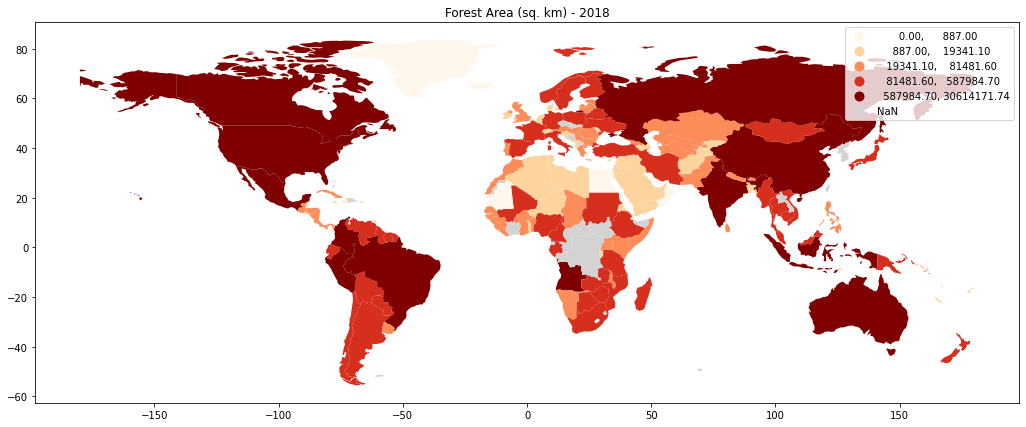

In [ ]:
data = wb.download(indicator=index[2],
                   country='all',
                   start=2018,
                   end=2018
                  )

data = data.reset_index(1)
data.columns = ['year','Forest Area']
data[['Forest Area']] = data[['Forest Area']].apply(pd.to_numeric)
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica'] #excluding Antarctica for visual purposes
map = map.set_index('name')
index_change = {
    'United States of America': 'United States',
    'Yemen': 'Yemen, Rep.',
    'Venezuela': 'Venezuela, RB',
    'Syria': 'Syrian Arab Republic',
    'Solomon Is.': 'Solomon Islands',
    'Russia': 'Russian Federation',
    'Iran': 'Iran, Islamic Rep.',
    'Gambia': 'Gambia, The',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Mauritania': 'Mauritius',
    'Egypt': 'Egypt, Arab Rep.'
}
map = map.rename(index=index_change)
map = map.join(data, how='outer')
map.plot('Forest Area',
          cmap='OrRd', 
          scheme='quantiles', 
          missing_kwds={"color": "lightgrey"}, 
          legend=True, 
          figsize=(18,7)
        )
plt.title('Forest Area (sq. km) - 2018')
plt.savefig('map_forest.png', dpi = 200)
plt.show()

In [ ]:
data.head()

,year,Forest Area
country,,
Africa Eastern and Southern,2018,4544314.78
Africa Western and Central,2018,1807898.60
Arab World,2018,372634.10
Caribbean small states,2018,364223.40
Central Europe and the Baltics,2018,381258.00


In [ ]:
data.nlargest(5, 'Forest Area')

,year,Forest Area
country,,
IDA & IBRD total,2018,3.061417e+07
Low & middle income,2018,2.992751e+07
Middle income,2018,2.683188e+07
IBRD only,2018,2.413630e+07
Upper middle income,2018,2.005541e+07
